In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "/home/unix/sjohri/valab_sjohri/projects/beanie_private/"

In [3]:
def get_res(res):
    names=["2pat","4pat","6pat","8pat"]
    df = pd.DataFrame(index=names,columns=["cpu_time","wall_time","max_mem","mean_mem","median_mem","final_mem","result"])
    for name in names:
        f = open(path+"/profiling/results/test_"+res+"/"+name+"spergroup_100cellsperpat.txt","r")
        out = f.readline()
        df.loc[name,"wall_time"] = float(out[23:].strip("\n"))
        out = f.readline()
        df.loc[name,"cpu_time"] = float(out[22:].strip("\n"))
        out = f.readline()
        mem_list = [float(x.strip(" ").strip("[").strip("]")) for x in out.split(",")]
        df.loc[name,"max_mem"] = max(mem_list)
        df.loc[name,"mean_mem"] = np.mean(mem_list)
        df.loc[name,"median_mem"] = np.median(mem_list)
        df.loc[name,"final_mem"] = mem_list[-1]
    df["result"] = res
    return df

In [4]:
df1 = get_res("small2")
df2 = get_res("medium")
df3 = get_res("large")

In [5]:
df_comp = pd.concat([df1,df2,df3])
df_comp

,cpu_time,wall_time,max_mem,mean_mem,median_mem,final_mem,result
2pat,15.328,303.482,688.992,389.003,395.008,296.812,small2
4pat,25.2759,379.691,1224.88,615.392,621.488,412.875,small2
6pat,38.9478,483.294,1802.5,899.844,890.43,568.059,small2
8pat,56.7171,591.162,2415.92,1215.06,1224.16,738.742,small2
2pat,20.8392,419.539,689.961,389.345,395.371,297.066,medium
4pat,40.2156,519.343,1231.5,617.129,622.457,415.328,medium
6pat,69.1869,658.474,1809.9,901.279,894.406,579.816,medium
8pat,102.606,806.845,2440.85,1215.03,1171.79,756.012,medium
2pat,23.4106,536.009,683.875,389.624,389.852,297.367,large
4pat,44.3256,645.762,1228.21,617.872,622.266,412.152,large


In [6]:
df_comp.loc["2pat",]

,cpu_time,wall_time,max_mem,mean_mem,median_mem,final_mem,result
2pat,15.328,303.482,688.992,389.003,395.008,296.812,small2
2pat,20.8392,419.539,689.961,389.345,395.371,297.066,medium
2pat,23.4106,536.009,683.875,389.624,389.852,297.367,large


In [7]:
df_comp[df_comp.result=="large"]

,cpu_time,wall_time,max_mem,mean_mem,median_mem,final_mem,result
2pat,23.4106,536.009,683.875,389.624,389.852,297.367,large
4pat,44.3256,645.762,1228.21,617.872,622.266,412.152,large
6pat,71.2678,778.758,1808.04,897.57,890.48,573.359,large
8pat,106.15,940.195,2430.59,1207.51,1168.85,756.441,large


In [37]:
var = [["cpu_time", "wall_time"], ["max_mem", "mean_mem"]]
sig_size = ["small2", "medium", "large"]
d = {"small2":5, "medium":25, "large":50}

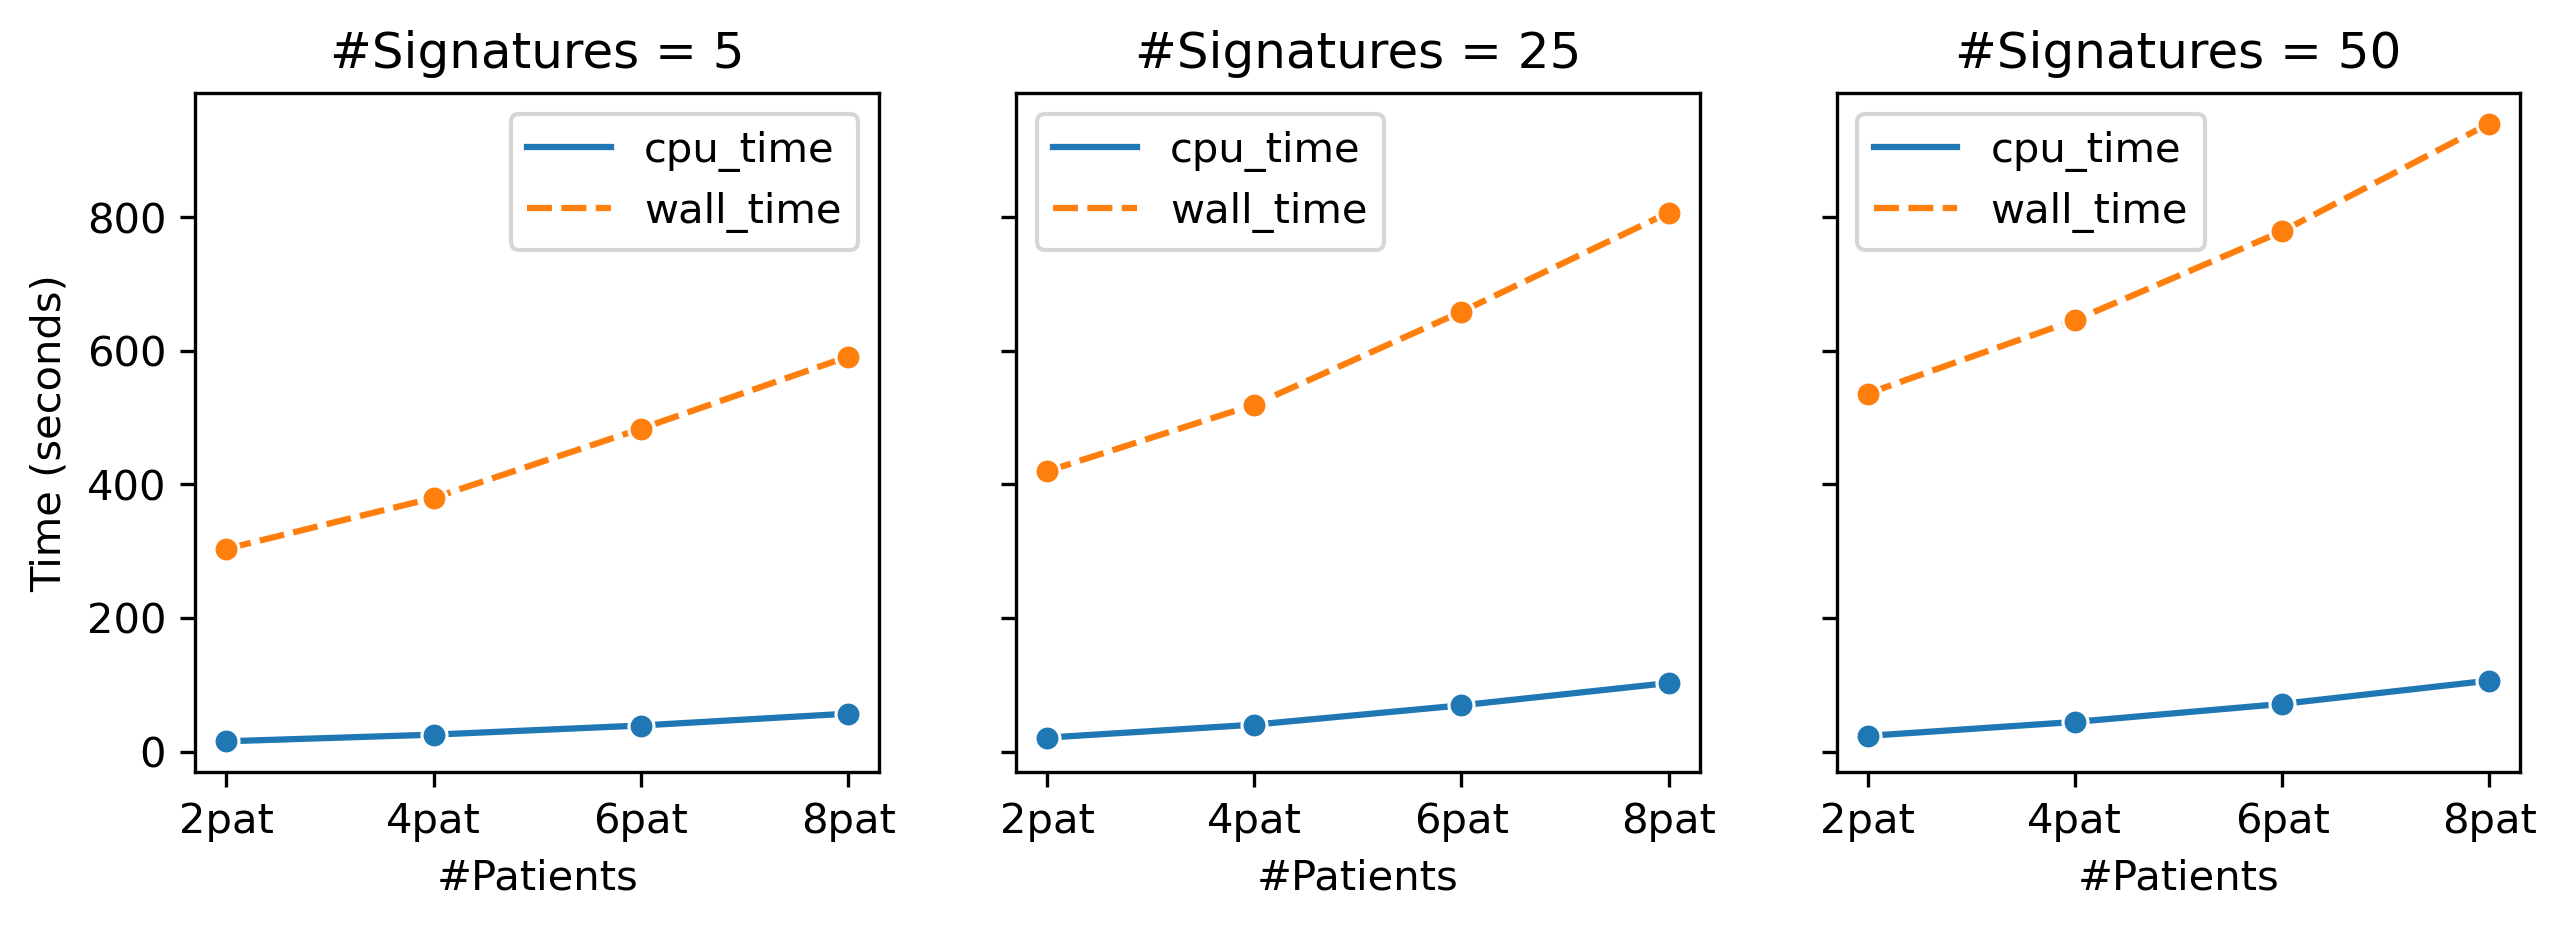

In [39]:
fig, axs = plt.subplots(1,3, figsize=(10,3), dpi=300, sharex=True, sharey=True)
for i in range(len(sig_size)):
    sns.lineplot(data=df_comp.loc[df_comp.result==sig_size[i],var[0]], 
                 marker="o", ax=axs[i])
    axs[i].set_ylabel("Time (seconds)")
    axs[i].set_xlabel("#Patients")
    axs[i].set_title(f"#Signatures = {d[sig_size[i]]}")

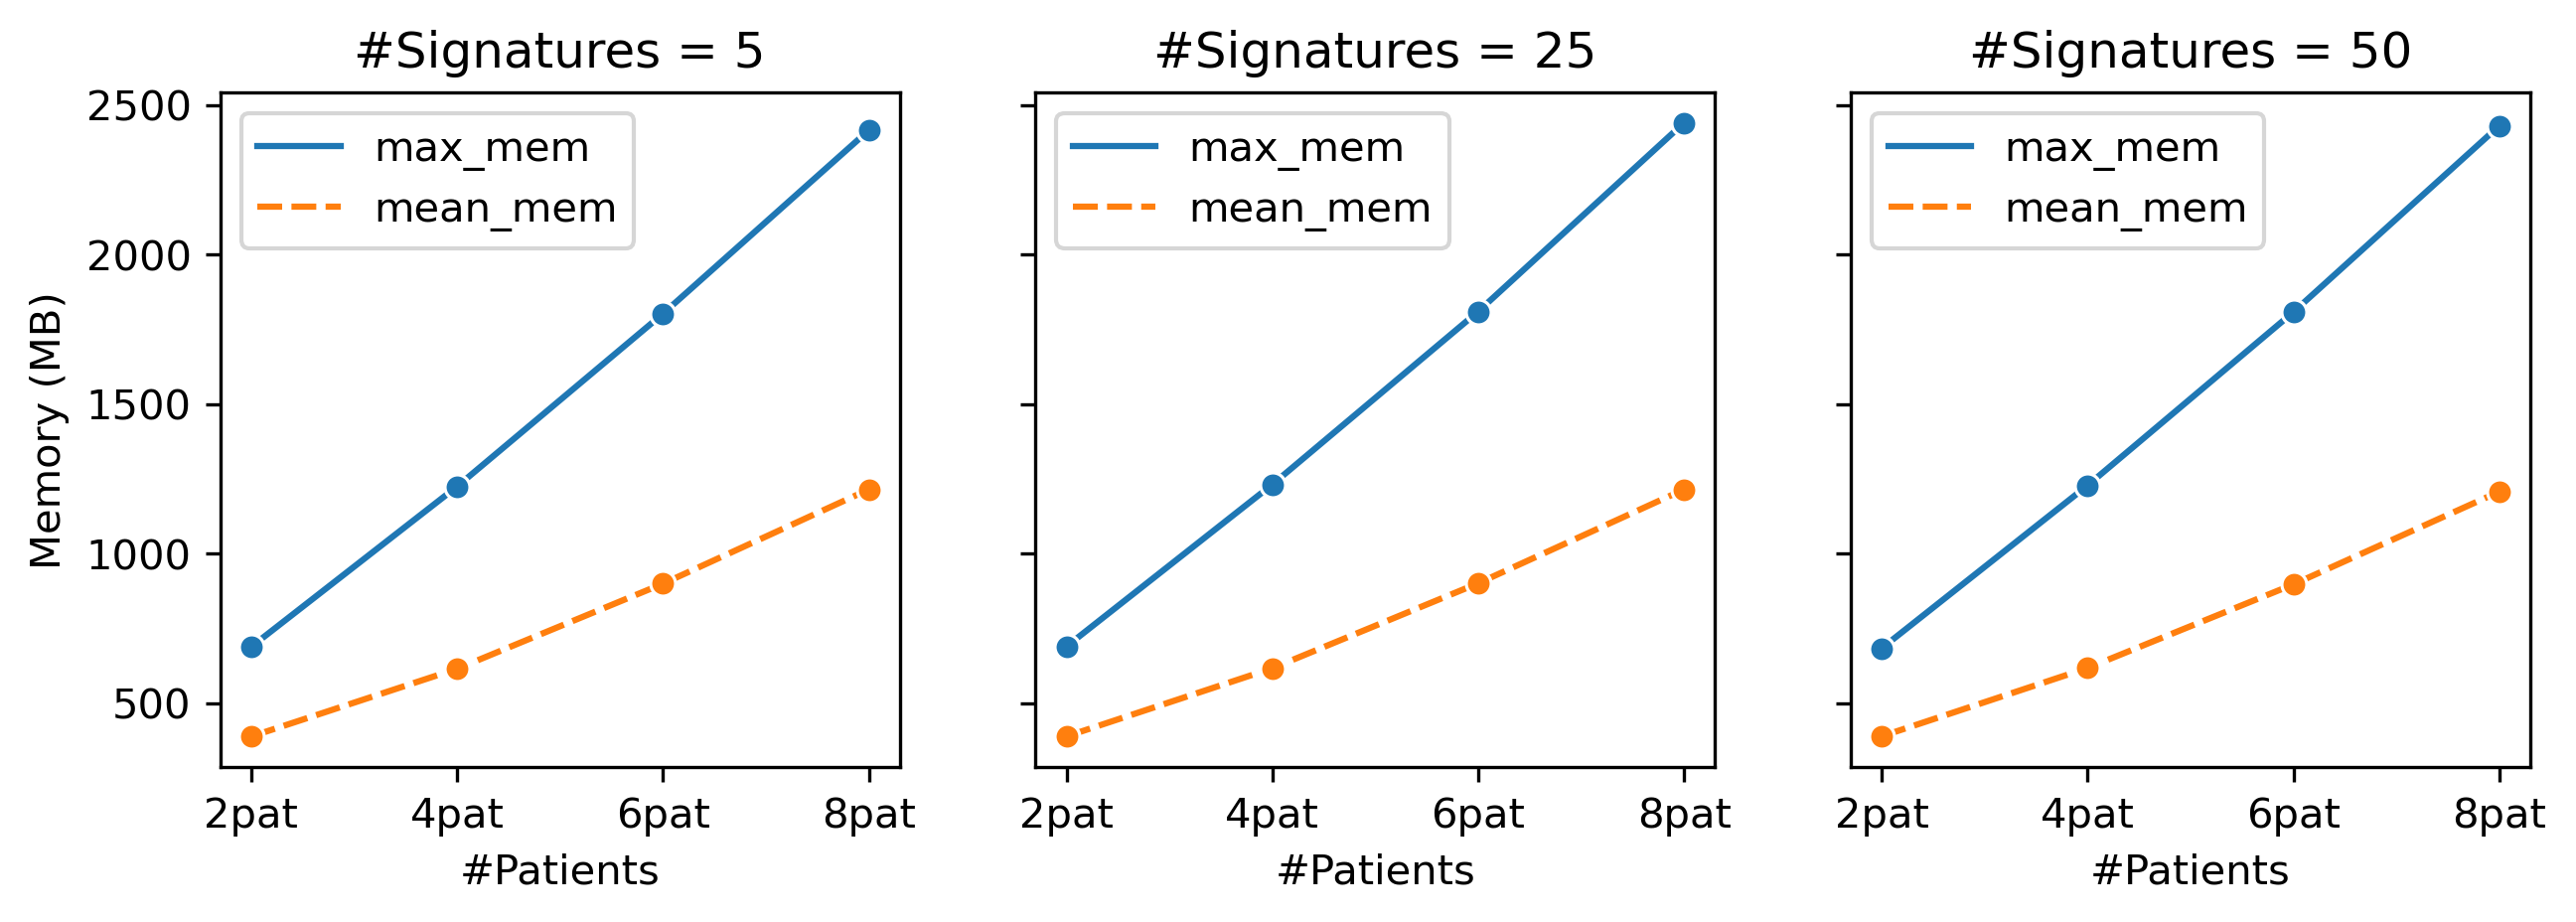

In [40]:
fig, axs = plt.subplots(1,3, figsize=(10,3), dpi=300, sharex=True, sharey=True)
for i in range(len(sig_size)):
    sns.lineplot(data=df_comp.loc[df_comp.result==sig_size[i],var[1]], 
                 marker="o", ax=axs[i])
    axs[i].set_ylabel("Memory (MB)")
    axs[i].set_xlabel("#Patients")
    axs[i].set_title(f"#Signatures = {d[sig_size[i]]}")